In [49]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [50]:
# 定义一个多层感知器（MLP）类，继承自 nn.Module
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()

        # 构建网络结构
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        # 定义前向传播
        x = x.view(x.size(0), -1) # Flatten the input tensor
        out = self.layers(x)
        return out


In [51]:
# 超参数设置
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 20

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [52]:
# 加载MNIST数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 创建模型、损失函数和优化器对象
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [53]:
print(len(train_dataset ))
print(len(test_dataset ))
print(len(train_loader  ))
print(len(test_loader ))

60000
10000
938
157


In [63]:
# 开始训练Loss.append(sum_loss)
Loss=[]
Correct=[]
Correct2=[]
correct = 0
total = 0
for epoch in range(num_epochs):
    sum_loss=0
    correct=0
    correct2=0
    for i, (images, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(images)

        # 计算损失
        loss = criterion(outputs, labels)
       

        # 反向传播和优化
        optimizer.zero_grad()
        sum_loss+=loss.item()
        loss.backward()
        optimizer.step()

        # 输出损失信息
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
    Loss.append(sum_loss)
    model.eval()
    with torch.no_grad():
        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        Correct2.append(correct/total)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        Correct.append(correct/total)

       
    


Epoch [1/20], Step [100/938], Loss: 0.0058
Epoch [1/20], Step [200/938], Loss: 0.0018
Epoch [1/20], Step [300/938], Loss: 0.0047
Epoch [1/20], Step [400/938], Loss: 0.0035
Epoch [1/20], Step [500/938], Loss: 0.0058
Epoch [1/20], Step [600/938], Loss: 0.0164
Epoch [1/20], Step [700/938], Loss: 0.0184
Epoch [1/20], Step [800/938], Loss: 0.0036
Epoch [1/20], Step [900/938], Loss: 0.0632
Epoch [2/20], Step [100/938], Loss: 0.0164
Epoch [2/20], Step [200/938], Loss: 0.0012
Epoch [2/20], Step [300/938], Loss: 0.0153
Epoch [2/20], Step [400/938], Loss: 0.0144
Epoch [2/20], Step [500/938], Loss: 0.0088
Epoch [2/20], Step [600/938], Loss: 0.0025
Epoch [2/20], Step [700/938], Loss: 0.0003
Epoch [2/20], Step [800/938], Loss: 0.0038
Epoch [2/20], Step [900/938], Loss: 0.0596
Epoch [3/20], Step [100/938], Loss: 0.0046
Epoch [3/20], Step [200/938], Loss: 0.0009
Epoch [3/20], Step [300/938], Loss: 0.0171
Epoch [3/20], Step [400/938], Loss: 0.0108
Epoch [3/20], Step [500/938], Loss: 0.0043
Epoch [3/20

In [55]:
# # 测试模型
# model.eval()
# Correct=[]
# correct = 0
# total = 0
# with torch.no_grad():
#     for images, labels in test_loader:
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#     Correct.append(correct)
print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Accuracy of the model on the 10000 test images: 95.26%


In [ ]:
print(len(Loss))
print()

20



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


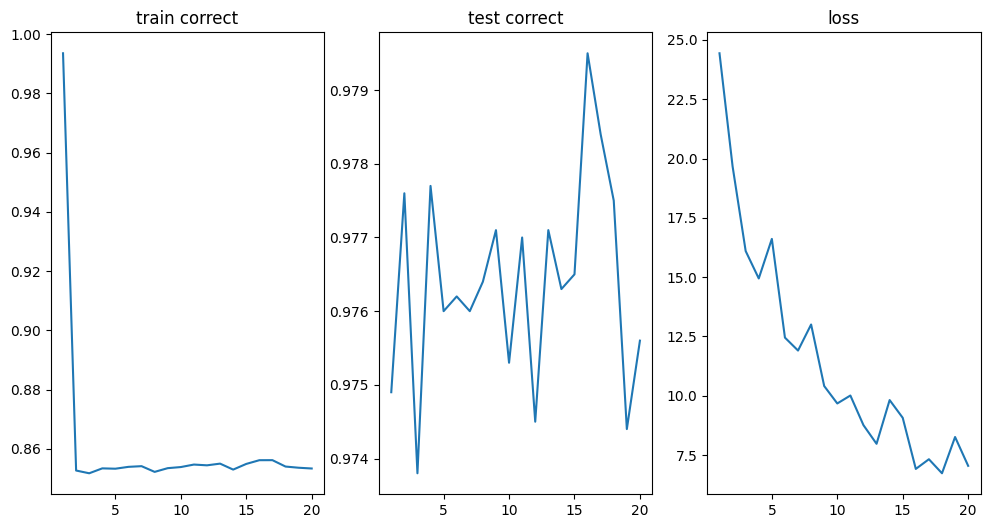

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(133)
plt.title('loss')
Loss_x=[i for i in range(1,num_epochs+1)]
print(Loss_x)
plt.plot(Loss_x,Loss)
plt.subplot(132)
plt.title('test correct')
Correct_x=[i for i in range(1,num_epochs+1)]
plt.plot(Correct_x,Correct)
plt.subplot(131)
plt.title('train correct')
Correct2_x=[i for i in range(1,num_epochs+1)]
plt.plot(Correct2_x,Correct2)
plt.show()